# Initial Exploratory Data Analysis of Audio Files

There are two general classifications of these audio files: 
* firearm discharge sounds
* non-firearm discharge sounds

In this notebook, I will explore the features that are present in the two categories. 

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import os
import pprint

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

colors=plt.cm.Purples(np.linspace(0,1,num=50))
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
cmap_seq = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 
            'afmhot', 'autumn', 'bone', 'cool', 'copper',
            'gist_heat', 'gray', 'hot', 'pink','spring', 'summer', 
            'winter', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 
            'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'afmhot', 
            'autumn']

mpl.rcParams.update({'figure.max_open_warning': 0})

## Data from ESC50

The ESC50 file is from the Environmental Sound Classification project: https://github.com/karolpiczak/ESC-50
* There are 50 categories
* This dataset has been reduced to include 11 audio clips for each category-->550 audio files

In [4]:
esc50path='../../Compile_firearm_sounds/non_fa_audio/'
esc50audio=os.listdir(path=esc50path)

## Using Librosa

## Obtain Sound Wave files

In [5]:
y,sr=librosa.load(esc50path+esc50audio[0])
print(y.shape)
                

(110250,)


In [6]:
wave, sr = librosa.load(esc50path+esc50audio[5], mono=True, duration=4)
print(wave.shape)
wave = np.asfortranarray(wave) #every other 3 elements in wave
print(wave.shape)
mfcc = librosa.feature.mfcc(wave,n_mfcc=20)
print(mfcc.shape)

(88200,)
(88200,)
(20, 173)


In [219]:
# mfcc = mfcc[:, :50]

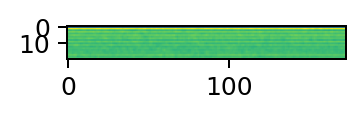

In [7]:
plt.figure(figsize=(2,5),dpi=180)
plt.imshow(mfcc)
# plt.colorbar()

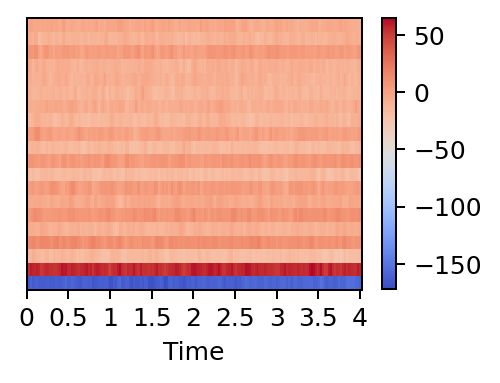

In [10]:
plt.figure(figsize=(3,2),dpi=180)
librosa.display.specshow(mfcc,x_axis='time')
plt.colorbar()

In [11]:
pd.DataFrame(mfcc)

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,-172.375229,-164.183594,-159.222000,-164.735336,-162.763260,-160.999680,-163.420746,-163.206268,-163.943268,-163.669235,...,-158.105576,-157.592987,-153.750488,-151.851181,-153.206543,-153.374939,-153.009659,-157.415695,-157.347290,-160.098328
1,51.635571,55.656250,60.128010,58.383026,57.579166,58.836784,56.888317,51.638756,52.447704,56.246342,...,57.473770,59.237244,55.068077,57.653507,56.756927,56.615776,55.743454,55.378235,59.868809,57.000450
2,-14.225782,-17.302990,-12.178736,-6.504385,-8.328000,-12.926437,-13.140177,-16.382366,-17.639261,-13.568687,...,-20.361145,-15.858572,-22.149494,-20.188316,-18.221340,-17.502687,-18.701208,-18.263092,-17.644876,-16.400360
3,13.160092,12.323536,13.613854,16.366457,15.482489,11.006269,12.993431,16.528137,15.985397,16.596985,...,14.124928,15.594532,10.059109,8.656679,11.097942,6.989679,5.010506,8.777245,8.882708,10.080847
4,-7.359180,-6.177795,-5.888935,-5.593465,-6.862461,-8.396131,-8.214783,-1.840395,-3.175858,-4.494580,...,-3.802298,-2.070963,-5.910108,-8.828962,-6.675865,-5.340195,-7.251294,-7.256005,-5.527587,-3.356039
5,-1.805998,3.360875,8.429762,10.645367,14.615707,11.680637,11.655254,9.912248,6.335712,4.757839,...,8.697297,8.582428,4.962797,6.015487,8.696217,11.740531,11.056648,9.678185,10.464808,13.349585
6,-5.006146,-5.286468,-4.565313,-5.435876,-3.093146,-4.795130,-2.999118,-3.549348,-5.495446,-5.295392,...,-6.380816,-6.588758,-7.413247,-5.691977,-0.447187,-0.965238,-3.371548,-2.045732,-2.084673,-4.429216
7,7.905182,2.886352,4.515929,6.452269,1.837345,1.098667,3.923831,6.047807,5.757006,2.867523,...,4.687695,2.614624,0.440125,0.100620,0.867835,0.946500,2.393557,3.904323,4.767833,2.351155
8,-17.480663,-17.425980,-17.492083,-15.595851,-17.777910,-20.514740,-18.995159,-13.442488,-12.905651,-11.949053,...,-11.633814,-16.253611,-22.561165,-20.938461,-16.106531,-15.136669,-16.277428,-16.382351,-18.632488,-25.144360
9,4.896821,8.399085,8.597394,8.994120,5.962021,5.113977,3.733203,7.316269,7.715674,7.298032,...,11.724390,10.518002,8.372488,6.745187,9.237125,11.489843,8.049762,7.836895,7.931412,10.159999


In [13]:
def compileSW(df,audio_path, filenamelist):
    '''df is an empty dataframe
    audio_path is the directory path defined relative to "notebooks" folder
    test_audio_path is the directory path defined rel to the "notebooks" folder
    filenamelist is type list of strings of the names of the files of interest'''
    for filename in filenamelist:
        if filename in os.listdir(path=audio_path):
            y,sr=librosa.load(audio_path+filename)  
        #
        y_df=pd.DataFrame(y) # the 0th row contains nonzero values
        df=pd.concat([df,y_df],axis=1)
    return df

In [16]:
sw_nonfa=pd.DataFrame() # empty dataframe for mfcc values of non firearm sounds
sw_nonfa=compileSW(sw_nonfa,esc50path,esc50audio)
sw_nonfa.columns=list(esc50audio)

## MFCC
With librosa, I can do some feature extraction of the audio files. 
For example, a feature called Mel-frequency cepstral coefficients (MFCC) can be extracted.  

In [17]:
def compileMFCC(df,audio_path, filenamelist):
    '''df is an empty dataframe
    audio_path is the directory path defined relative to "notebooks" folder
    test_audio_path is the directory path defined rel to the "notebooks" folder
    filenamelist is type list of strings of the names of the files of interest'''
    for filename in filenamelist:
        if filename in os.listdir(path=audio_path):
            y,sr=librosa.load(audio_path+filename)  
        #
        mfcc_vals=librosa.feature.mfcc(y)
        #
        mfcc_vals_df=pd.DataFrame(mfcc_vals[0]) # the 0th row contains nonzero values
        df=pd.concat([df,mfcc_vals_df],axis=1)
    return df

In [18]:
mfcc_nonfa=pd.DataFrame() # empty dataframe for mfcc values of non firearm sounds
mfcc_nonfa=compileMFCC(mfcc_nonfa,esc50path,esc50audio)
mfcc_nonfa.columns=list(esc50audio)

Visualize what this **mfcc_nonfa** dataframe looks like. 

In [19]:
mfcc_nonfa

,1-104089-A-22.wav,1-96950-B-9.wav,2-105270-A-47.wav,1-47273-A-21.wav,1-39901-A-11.wav,1-19840-A-36.wav,1-28135-B-11.wav,1-47819-A-5.wav,1-54747-A-46.wav,1-101336-A-30.wav,...,1-31251-B-6.wav,1-54065-B-45.wav,1-17742-A-12.wav,1-56234-A-9.wav,1-17092-B-27.wav,1-68628-A-27.wav,1-21189-A-10.wav,1-32318-A-0.wav,2-110614-B-8.wav,2-73544-A-27.wav
0,-414.388550,-324.410645,-357.097778,-762.962158,-144.103516,-172.375229,-82.001625,-460.695679,-141.239136,-483.970490,...,-198.628983,-4.275902,-379.214478,-157.182083,-263.595123,-218.667206,-27.945980,-400.558899,-156.785538,-189.486160
1,-206.392090,-351.370514,-358.638489,-651.929321,-133.958618,-164.183594,-88.649330,-456.137268,-147.335266,-487.555023,...,-185.610657,-2.414681,-366.548798,-167.034866,-275.960693,-205.763580,-31.026802,-401.852783,-163.761627,-200.812363
2,-77.142662,-400.146942,-367.105713,-491.988739,-134.818054,-159.222000,-100.324341,-454.715698,-154.716110,-349.589233,...,-144.072113,-13.133347,-346.273041,-189.166000,-327.111938,-198.597824,-35.479164,-397.770081,-177.587418,-203.612122
3,-73.311905,-410.871368,-366.149170,-229.213150,-135.583984,-164.735336,-97.184860,-451.076172,-155.868210,-127.547989,...,-109.709274,-20.551954,-331.432648,-210.168533,-340.514038,-218.905136,-39.687569,-394.414490,-180.669067,-188.815811
4,-137.822556,-419.234802,-362.390869,-133.259827,-144.909805,-162.763260,-92.164726,-451.540466,-156.678665,-98.918190,...,-106.537552,-28.973948,-351.975128,-231.926620,-319.429535,-293.439301,-47.899212,-389.895050,-178.543655,-205.402954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-23.220949,-577.844055,-413.119537,-799.262207,-109.907478,-160.707184,-66.273346,-320.582672,-139.055023,-591.598206,...,-173.918121,-280.927521,-353.964294,-694.113953,-885.361572,-623.464539,-21.853062,-391.158569,-166.152527,-259.368744
212,-28.359577,-578.803467,-417.959656,-799.262207,-114.671257,-162.767120,-59.677475,-322.370453,-136.551987,-591.598206,...,-180.462082,-279.821533,-345.120117,-694.113953,-885.361572,-623.464539,-13.183520,-411.316803,-179.142960,-282.177734
213,-25.617229,-575.404602,-424.379425,-799.262207,-118.556534,-159.581207,-59.596603,-328.498108,-137.211349,-591.598206,...,-182.591370,-284.501068,-336.881866,-694.113953,-885.361572,-623.464539,-9.740956,-419.742310,-185.918304,-302.786713
214,8.336450,-573.552673,-427.354187,-799.262207,-125.627998,-155.286865,-59.486389,-330.972351,-134.327362,-591.598206,...,-178.336182,-282.991669,-330.303894,-694.113953,-885.361572,-623.464539,-9.464329,-428.474060,-193.705673,-248.683655


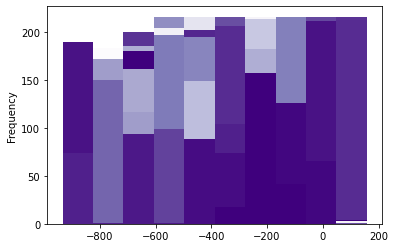

In [20]:
mfcc_nonfa.plot.hist(legend=False)

## Log Mel Spectrogram

In [13]:
def LogMelSpec(df,audio_path,test_audio_path,filenamelist):
    '''audio_path and filename'''
    for filename in filenamelist:
        if filename in os.listdir(path=audio_path):
            y,sr=librosa.load(audio_path+filename,duration=2)  
        if  filename in os.listdir(path=test_audio_path):
            y,sr=librosa.load(test_audio_path+filename,duration=2)        
        
        melspec=librosa.feature.melspectrogram(y)
        log_S=librosa.amplitude_to_db(melspec)
        logS_flat=log_S.reshape((1,len(log_S.flatten()))).T #make into a column
        if filename==filenamelist[0]:
            length=len(logS_flat)
        
        #convert to a dataFrame
        logS_flat_df=pd.DataFrame(logS_flat)
        #concatenate to the main dataFrame
        df=pd.concat([df,logS_flat_df.iloc[:length]],axis=1)
    return df

In [14]:
logMS_nonfa=pd.DataFrame()
logMS_nonfa=LogMelSpec(logMS_nonfa,esc50_audio_path,esc50_test_audio_path,ESC50filenames)

In [15]:
logMS_nonfa.columns=list(ESC50filenames)

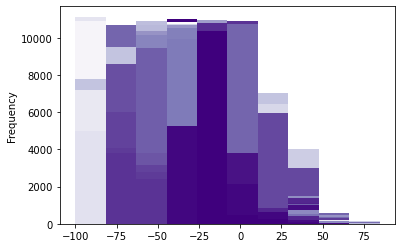

In [16]:
logMS_nonfa.plot.hist(legend=False)

## RMS
Calculating the root mean square for each frame from the audio samples. 
The default frame_length is used (frame_length=2048). 

In [17]:
def compileRMS(df, audio_path, test_audio_path, filenamelist):
    for filename in filenamelist:
        if filename in os.listdir(path=audio_path):
            y,sr=librosa.load(audio_path+filename)  
        if  filename in os.listdir(path=test_audio_path):
            y,sr=librosa.load(test_audio_path+filename)    
        #
        rms_vals=librosa.feature.rms(y)
        #
        rms_vals_df=pd.DataFrame(rms_vals).T # the 0th row contains nonzero values
        df=pd.concat([df,rms_vals_df],axis=1)
    return df

In [18]:
rms_nonfa=pd.DataFrame() # empty dataframe for mfcc values of non firearm sounds
rms_nonfa=compileRMS(rms_nonfa,esc50_audio_path,esc50_test_audio_path,ESC50filenames)
rms_nonfa.columns=list(ESC50filenames)

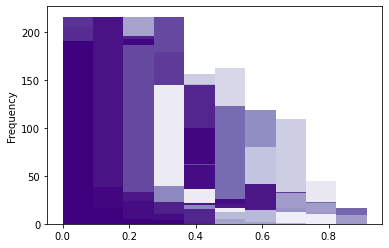

In [19]:
rms_nonfa.plot.hist(legend=False)

## Spectral Flatness
According to the librosa documentation, this feature is a measurement to help quantify how noise-like a sound is as opposed to being tone-like. 

In [21]:
def compileSpecFlat(df, audio_path, test_audio_path, filenamelist):
    for filename in filenamelist:
        if filename in os.listdir(path=audio_path):
            y,sr=librosa.load(audio_path+filename)  
        if  filename in os.listdir(path=test_audio_path):
            y,sr=librosa.load(test_audio_path+filename)    
        #
        specflat_vals=librosa.feature.spectral_flatness(y)
        #
        specflat_vals_df=pd.DataFrame(specflat_vals).T # the 0th row contains nonzero values
        df=pd.concat([df,specflat_vals_df],axis=1)
    return df

In [22]:
specflat_nonfa=pd.DataFrame() # empty dataframe for mfcc values of non firearm sounds
specflat_nonfa=compileSpecFlat(specflat_nonfa,esc50_audio_path,esc50_test_audio_path,ESC50filenames)
specflat_nonfa.columns=list(ESC50filenames)

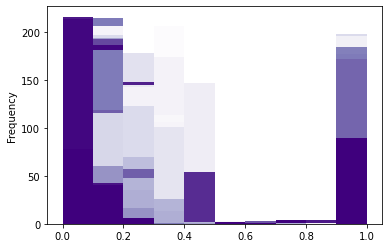

In [23]:
specflat_nonfa.plot.hist(legend=False)

There's a lot going on in these graphs, and it's not very intuitive to see which audio files may be of interest. In the next notebook, I'll look at this in a different manner... 

## Firearm Sounds

In [37]:
fa_audio_path='../../Compile_firearm_sounds/fa_audio/'
firearm_filenames=os.listdir(path=fa_audio_path)
print(len(firearm_filenames))

for file in firearm_filenames:
    if (file[-3:]!='wav') and (file[-3:]!='mp3'):
        print(file)

562
52284__trip2000__gun-shot.aiff
382735__schots__gun-shot.aiff


In [38]:
mfcc_fa=pd.DataFrame() # empty dataframe for mfcc values of firearm sounds
mfcc_fa=compileMFCC(mfcc_fa,fa_audio_path,firearm_filenames)
mfcc_fa.columns=list(firearm_filenames)

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

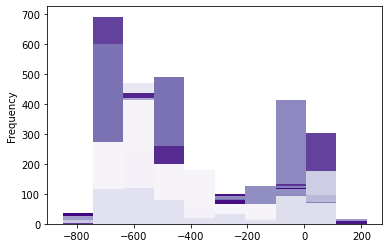

In [39]:
mfcc_fa.plot.hist(legend=False)

In [28]:
rms_fa=pd.DataFrame() # empty dataframe for rms values of firearm sounds
rms_fa=compileRMS(rms_fa,fa_audio_path,fa_test_audio_path,firearm_filenames)
rms_fa.columns=list(firearm_filenames)

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


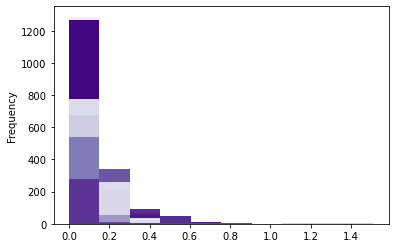

In [29]:
rms_fa.plot.hist(legend=False)

In [30]:
specflat_fa=pd.DataFrame() # empty dataframe for rms values of firearm sounds
specflat_fa=compileRMS(specflat_fa,fa_audio_path,fa_test_audio_path,firearm_filenames)
specflat_fa.columns=list(firearm_filenames)

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


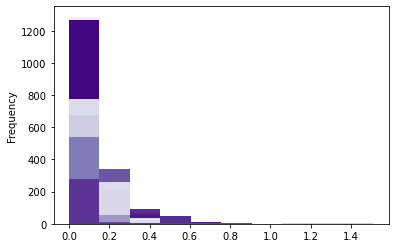

In [31]:
specflat_fa.plot.hist(legend=False);

In [32]:
logMS_fa=pd.DataFrame()
logMS_fa=LogMelSpec(logMS_fa,fa_audio_path,fa_test_audio_path,firearm_filenames)

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


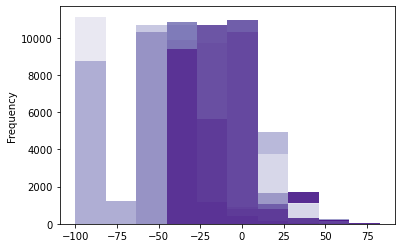

In [33]:
logMS_fa.plot.hist(legend=False)

In [68]:
sw_fa=pd.DataFrame() # empty dataframe for mfcc values of non firearm sounds
sw_fa=compileMFCC(sw_fa,fa_audio_path,fa_test_audio_path,firearm_filenames)

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


## Compare Firearm Sounds with Non-firearm Sounds

## Sound wave Comparison

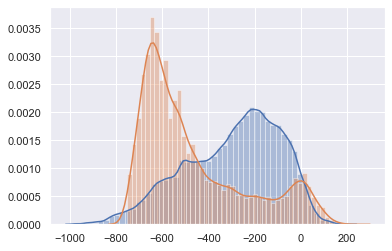

In [70]:
for a in [sw_nonfa,sw_fa]:
    sns.distplot(a)

In [67]:
m_nonfa=mfcc_nonfa.sum(axis=1)
m_fa=mfcc_fa.sum(axis=1)
type(m_nonfa)

pandas.core.series.Series

In [68]:
mfcc_fa.shape

(1287, 562)

In [69]:
len(mfcc_nonfa.T)

550

## MFCC Comparison

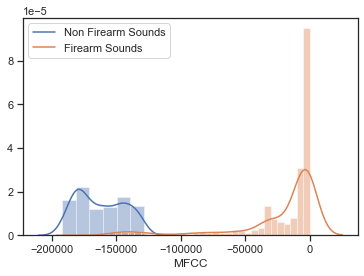

In [70]:
# fig, ax = plt.subplots()
# sns.set()
# ax=sns.distplot(mfcc_nonfa,hist=True)
labels=['Non Firearm Sounds', 'Firearm Sounds']
c=0
for a in [m_nonfa,m_fa]:
    sns.distplot(a,kde_kws={"label": labels[c]})
    c+=1
plt.xlabel('MFCC')
plt.savefig('../reports/figures/MFCC_avg_comparison')

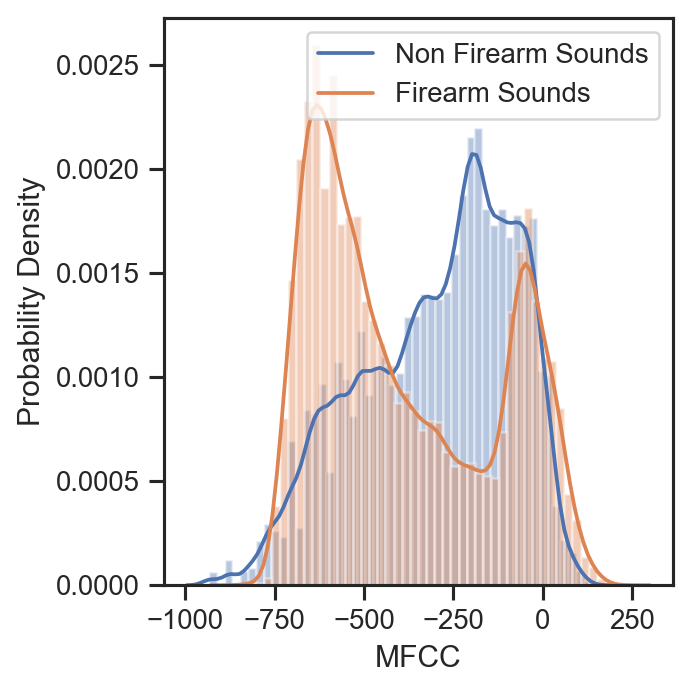

In [61]:
c=0
sns.set_style(style='ticks')
plt.figure(figsize=(4,4),dpi=180)
for a in [mfcc_nonfa,mfcc_fa]:
    sns.distplot(a,kde_kws={"label": labels[c]})
    c+=1
plt.xlabel('MFCC',fontsize=12)
plt.ylabel('Probability Density')
plt.tight_layout()
plt.savefig('../reports/figures/MFCC_comparison')

In [66]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(m_nonfa, m_fa)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=28.499, p=0.000
Different distributions (reject H0)


## log MS Comparison

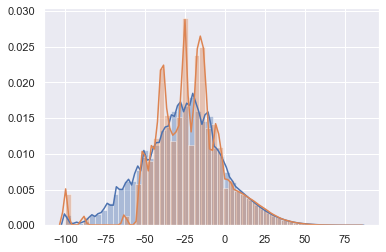

In [60]:
for a in [logMS_nonfa,logMS_fa]:
    sns.distplot(a)

## Spectral Flatness Comparison

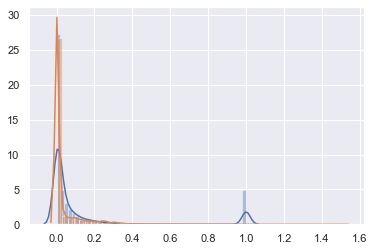

In [61]:
for a in [specflat_nonfa,specflat_fa]:
    sns.distplot(a)

## RMS Comparison

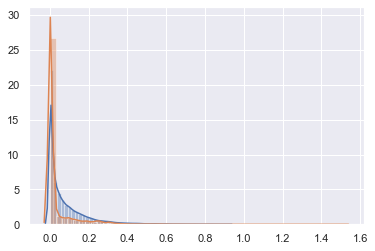

In [62]:
for a in [rms_nonfa,rms_fa]:
    sns.distplot(a)